<a href="https://colab.research.google.com/github/Malikarbaaz/CREDIT_CARD_DEFAULT_PREDICTION/blob/main/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [153]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [154]:
# Mounting drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
 # Importing Dataset
file_path = '/content/drive/MyDrive/Credit Card Default Prediction/Data & Resources/default of credit card clients.xls'

In [156]:
# Reading our Dataset
data = pd.read_excel(file_path, header=1)

In [157]:
# head gives the top 5 rows of the given dataset
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [158]:
# tail gives the bottom 5 rows of the given dataset
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [159]:
#info() print the basic information of our DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [160]:
# describe() gives the overall descriptive summary of the dataframe
data.describe(include='all').T       # transpose() convert the column to row and row to column.

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [161]:
#  Shape give the total number of rows and columns
print('Rows {} , Columns {}'.format(data.shape[0], data.shape[1]))

Rows 30000 , Columns 25


In [162]:
# Checking the total null values in our dataset.
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [163]:
# Identifying the unique number of values in the dataset
data.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [164]:
# Checking the totol number of duplicate values 
print('Duplicate values in our dataset is:',len(data[data.duplicated()]))

Duplicate values in our dataset is: 0


In [165]:
# Creating a copy of dataframe
df = data.copy()

In [166]:
print('Column names are :\n',list(data.columns))

Column names are :
 ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


In [167]:
# renaming the column feature for better understanding
df.rename(columns = {'default payment next month':'Next_month_defaulter','PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN',
                     
                   'PAY_5':'PAY_MAY','PAY_6':'PAY_APR','BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL',

                   'BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR','PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG',
                   
                   'PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'} ,inplace=True )

In [168]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Next_month_defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [169]:
df['Next_month_defaulter'].value_counts()

0    23364
1     6636
Name: Next_month_defaulter, dtype: int64

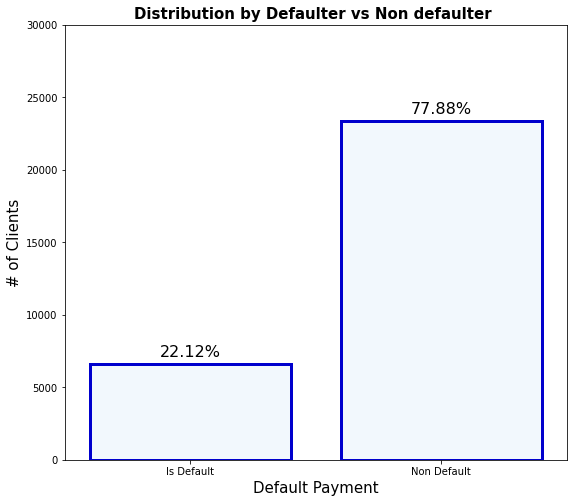

In [170]:
#
df['Defaulter'] = df.Next_month_defaulter.replace([1,0], ['Is Default', 'Non Default'])
                                                   
#plot graph
plt.figure(figsize=(9,8))

ax = sns.countplot(x="Defaulter", data=df,color = 'aliceblue', edgecolor = 'mediumblue',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,30000)
plt.title('Distribution by Defaulter vs Non defaulter ',weight ='bold', fontsize= 15)
for p in ax.patches:                               # This step is used for showing the percentage on the graph
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

### **Categorical Features**

sex

In [195]:
print('SEX column distribution : 1=Male, 2=Female')
df['SEX'].value_counts()

SEX column distribution : 1=Male, 2=Female


2    18112
1    11888
Name: SEX, dtype: int64

education


In [190]:
print('EDUCATION column distribution : 1=Graduate school, 2=University, 3=High school, 4=Others, 5=unknown, 6=unknown')
df['EDUCATION'].value_counts()

EDUCATION column distribution : 1=Graduate school, 2=University, 3=High school, 4=Others, 5=unknown, 6=unknown


2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [192]:
colm = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[colm, 'EDUCATION'] = 1
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

marriage

In [193]:
print('MARRIAGE column distribution : 1=Married, 2=Single, 3=Others')
df['MARRIAGE'].value_counts()

MARRIAGE column distribution : 1=Married, 2=Single, 3=Others


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [194]:
colm = df['MARRIAGE'] == 0
df.loc[colm, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [196]:
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [245]:
df_category = df[cat_features]
df_category = pd.concat([df_category, df['Defaulter']], axis=1)

In [246]:
# lets replace the values of categorical column by names as given in the data above
df_category.replace({'SEX':{1:'Male', 2:'Female'} , 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'},
               'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [247]:
df_category.head(10)

,SEX,EDUCATION,MARRIAGE,Defaulter
0,Female,university,married,Is Default
1,Female,university,single,Is Default
2,Female,university,single,Non Default
3,Female,university,married,Non Default
4,Male,university,married,Non Default
5,Male,graduate school,single,Non Default
6,Male,graduate school,single,Non Default
7,Female,university,single,Non Default
8,Female,high school,married,Non Default
9,Male,high school,single,Non Default


Female    18112
Male      11888
Name: SEX, dtype: int64


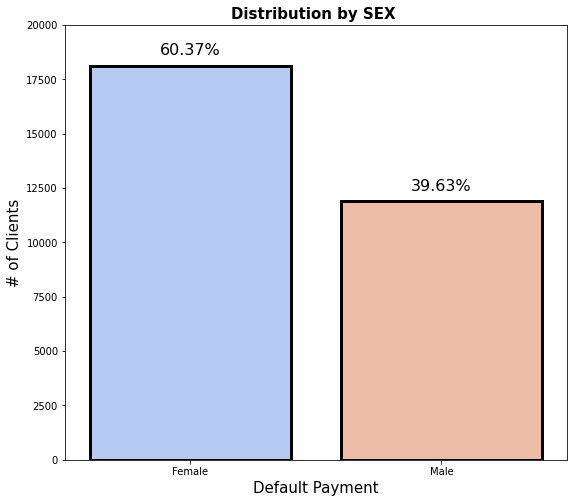

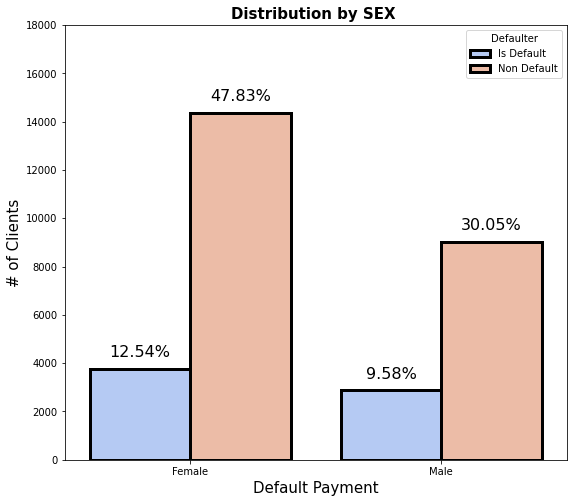

In [253]:
print(df_category['SEX'].value_counts())

#plotting graph 
plt.figure(figsize=(9,8))
ax = sns.countplot(x="SEX", data=df_category,  palette = 'coolwarm', edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,20000)
plt.title('Distribution by SEX ',weight ='bold', fontsize= 15)
for p in ax.patches:                              
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

# plotting graph for 
plt.figure(figsize=(9,8))
ax = sns.countplot(x="SEX", data=df_category,  palette = 'coolwarm', hue="Defaulter" ,edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,18000)
plt.title('Distribution by SEX ',weight ='bold', fontsize= 15)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64


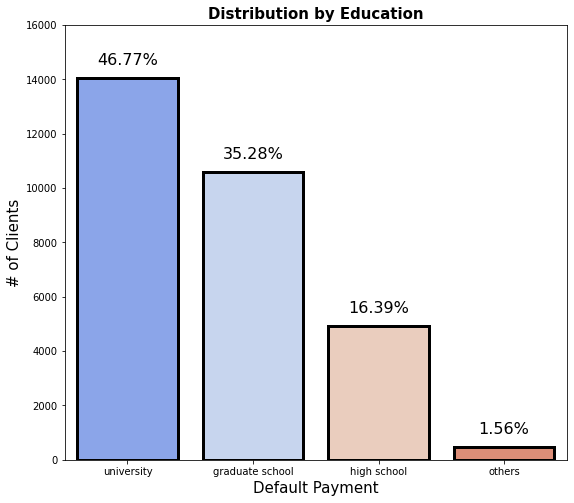

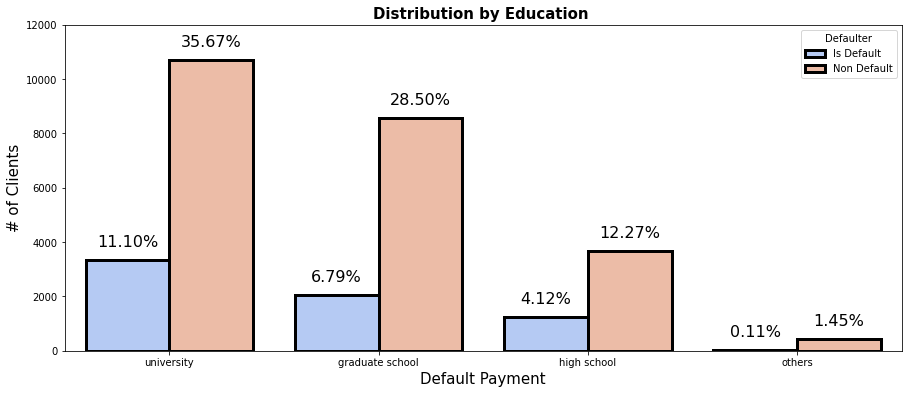

In [257]:
print(df_category['EDUCATION'].value_counts())

#plotting graph 
plt.figure(figsize=(9,8))
ax = sns.countplot(x="EDUCATION", data=df_category,  palette = 'coolwarm', edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,16000)
plt.title('Distribution by Education',weight ='bold', fontsize= 15)
for p in ax.patches:                              
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

# plotting graph for 
plt.figure(figsize=(15,6))
ax = sns.countplot(x="EDUCATION", data=df_category,  palette = 'coolwarm', hue="Defaulter" ,edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,12000)
plt.title('Distribution by Education ',weight ='bold', fontsize= 15)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64


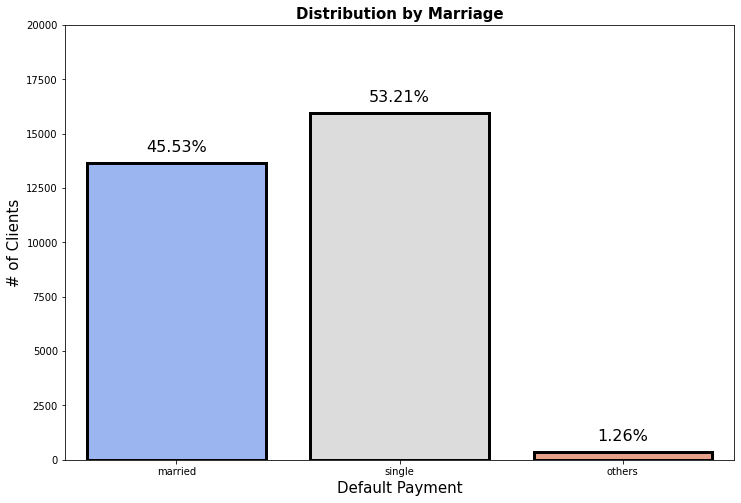

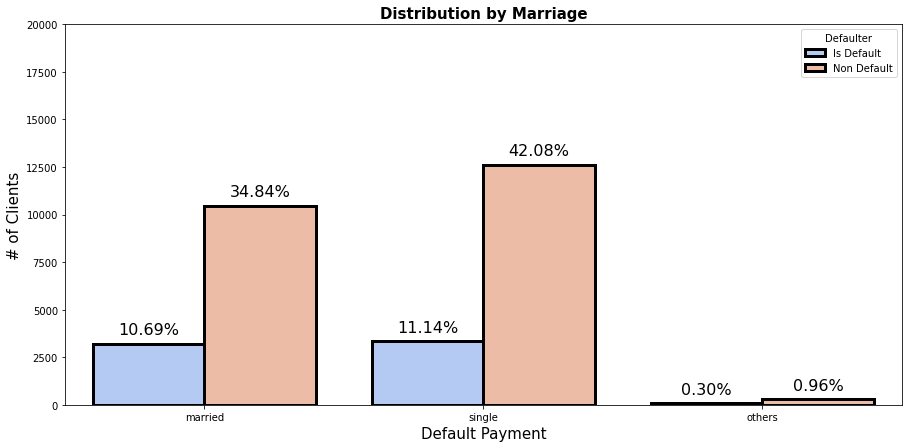

In [261]:
print(df_category['MARRIAGE'].value_counts())

#plotting graph 
plt.figure(figsize=(12,8))
ax = sns.countplot(x="MARRIAGE", data=df_category,  palette = 'coolwarm', edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,20000)
plt.title('Distribution by Marriage',weight ='bold', fontsize= 15)
for p in ax.patches:                              
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

# plotting graph for 
plt.figure(figsize=(15,7))
ax = sns.countplot(x="MARRIAGE", data=df_category,  palette = 'coolwarm', hue="Defaulter" ,edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,20000)
plt.title('Distribution by Marriage',weight ='bold', fontsize= 15)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)